# Zomato Data Analysis project

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Zomato data .csv")

In [5]:
df = data.copy()

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [8]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [11]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# CORRECT the columns

In [13]:
def rating(value):
    value = str(value).split('/')
    value = value[0]
    return float (value)

df['rate'] = df['rate'].apply(rating)

In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of resturant')

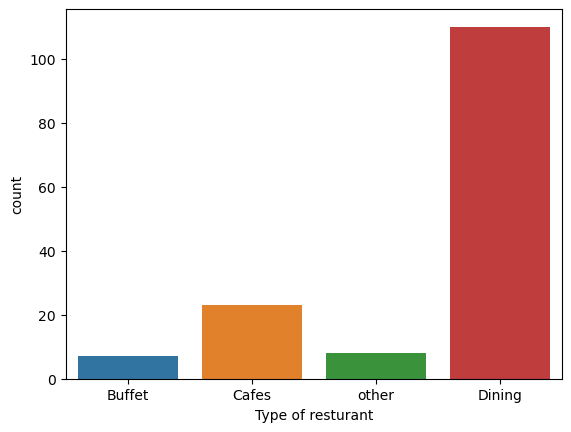

In [15]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of resturant')

# CONCLUSION - majority of the restaurant fall with dining

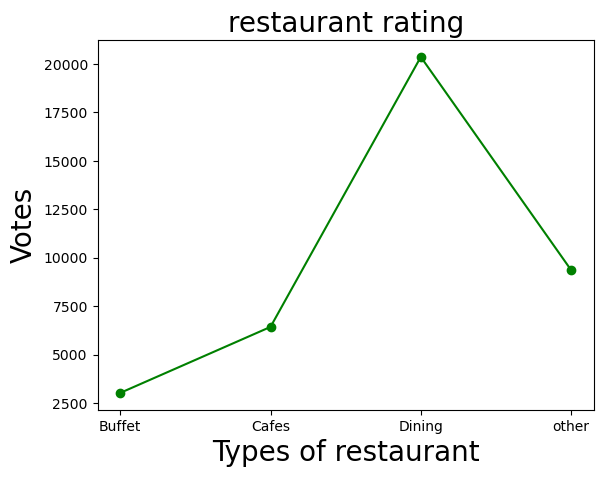

In [31]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result.index, result['votes'], c="green", marker="o")
plt.title("restaurant rating",size = 20)
plt.xlabel("Types of restaurant", color="k", fontsize=20)
plt.ylabel("Votes", color="k", fontsize=20)
plt.show()

# conclusion- dinning restaurant has received maximum rating

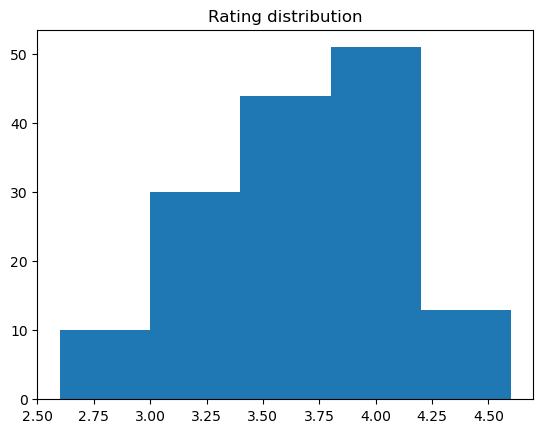

In [33]:
plt.hist(df['rate'],bins = 5)
plt.title('Rating distribution')
plt.show()

# CONCLUSION- The majority restaurant receive ratings  from 3.5 to 4

In [34]:
# Average order spending by couples

In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


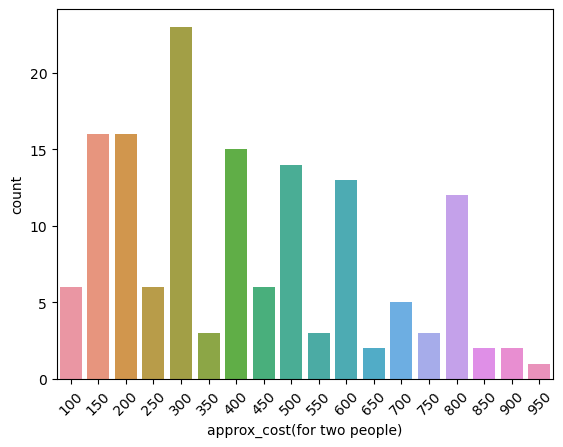

In [40]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.xticks(rotation = 45)
plt.show()

# CONCLUSION - the majority of couple prefer restaurants with an approxe cost of 300 rs 

In [42]:
# which mode receive maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

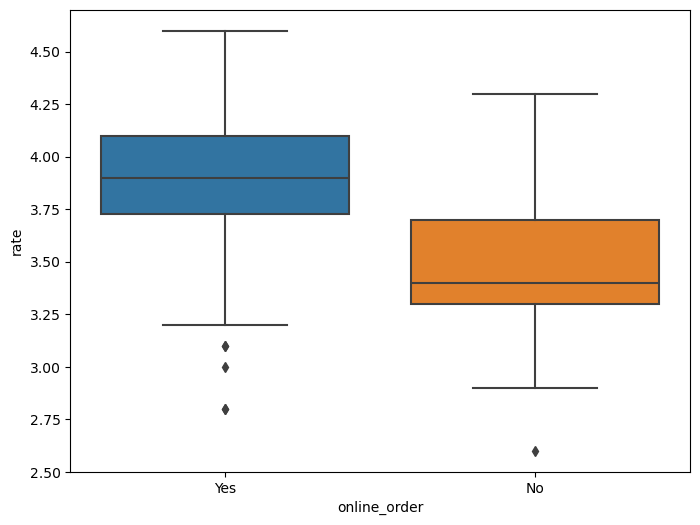

In [44]:
plt.figure(figsize = (8,6))
sns.boxplot(x='online_order' , y ='rate', data = df)

### CONCLUSION - OFFLINE ORDER RECEIVED LOWER RATINH AS COMPARED TO ONLINE ORDER

In [45]:
# WHICH TYPES OF RESTAURANTS RECEIVE 

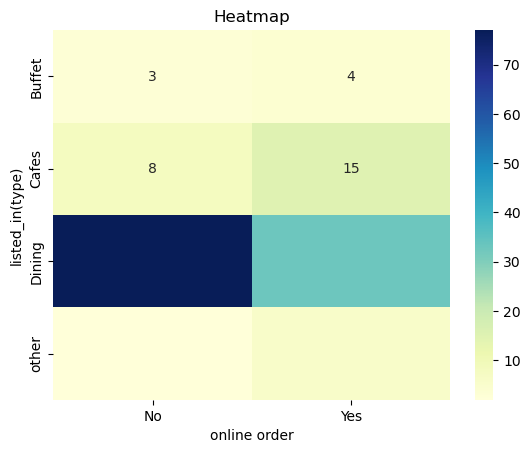

In [49]:
table = df.pivot_table(index = 'listed_in(type)',columns = 'online_order',aggfunc = 'size',fill_value = 0)
sns.heatmap(table,annot=True,cmap='YlGnBu', fmt = 'd')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('listed_in(type)')
plt.show()

# CONCLUSION - Dinning restaurants primarily accept offline ordrs,whereas cafes primarily receive online orders.This suggested that clints prefer orders in person at restaurants but prefer online ordering at cafes.